# Week 3 - 

By Group XX:

-   Aleksandar Lukic - s194066
-   Paula Barho - s242926
-   Victor Gustav Harbo Rasmussen - s204475

#### Preamble

In [445]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [446]:
# Set pandas display options to show all columns for .head command
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.width", None)        # Auto-detect the display width
pd.set_option("display.max_colwidth", None) # Show full content of each column

In [447]:
# Get path of data directory
files_path = os.path.abspath(os.path.join(os.pardir, "files"))
files_path

'/home/aleksandar-lukic/school/02806_Social_Data/files'

In [448]:
# Get path of plot directory
plots_path = os.path.abspath(os.path.join(os.pardir, "plots"))
plots_path

'/home/aleksandar-lukic/school/02806_Social_Data/plots'

In [449]:
# Read crime data from the CSV file
data_path = os.path.abspath(os.path.join(os.pardir, "data"))
csv_name = "Police_Department_Incident_Reports_Complete.csv"
df = pd.read_csv(os.path.join(data_path, csv_name))

## Part 1: Fundamentals of data visualization

> *Excercise:* Questions for the lecture. 
>
> * As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it"s mathematical formulation. Can you think of an example where it fails (and visualization works)?

_"**Pearson correlation coefficient** is a correlation coefficient that measures linear correlation between two sets of data"_

> * What is the difference between a bar-chart and a histogram?

A bar chart presents categorical data with rectangular bars, where their heights are proportional to the values they represent. A histogram is also a bar chart, but where the values have been grouped into bins. This may make it easier to get an overview of many categories, whereas a simple bar chart can be enough if there are few categories to tally up. 

> * I mention in the video that it"s important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.

The following approach was found at: [Statistics How To](https://www.statisticshowto.com/choose-bin-sizes-statistics/).

1. Find the minimum and maximum values (bar heights).

2. If the values are not integers; Lower the minimum and raise the maximum to their nearest integers.

3. Choose the bin size (no. of bins) based on what information is interesting to convey.

4. Divide your range (the numbers in your data set) by the bin size.

5. Create the bin boundaries incrementally from minimum to maximum by the value from step 4.

## Part 2: Reading about the theory of visualization

Since we can go deeper with the visualization this year, we are going to read the first couple of chapters from [*Data Analysis with Open Source Tools*](http://shop.oreilly.com/product/9780596802363.do) (DAOST). It"s pretty old, but I think it"s a fantastic resource and one that is pretty much as relevant now as it was back then. The author is a physicist (like Sune) so he likes the way he thinks. And the books takes the reader all the way from visualization, through modeling to computational mining. Anywho - it"s a great book and well worth reading in its entirety. 

As part of this class we"ll be reading the first chapters. Today, we"ll read chaper 2 (the first 28 pages) which supports and deepens many of the points we made during the video above. 

To find the text, you will need to go to **Teams** and have a look under the `Files` tab. The path is `/Documents/General/Week3/DAOST_chapter1.pdf`.

> *Excercise*: Questions for DAOST 
> * Explain in your own words the point of the jitter plot.

If the data is made up of a numeric value (e.g. no. of months in office) and a categorical value (e.g. name of a president), their points might overlap to some degree. To counter this, we can applly "jitter", which is to randomly distribute the points along a 1D-line, where the numeric value is the same. We can from this quickly see if there are any numeric patterns, such as some values that appear frequent (e.g. 48 and 96 months in office, which are exactly equivalent to 1 and 2 full terms in office). 

> * Explain in your own words the point of figure 2-3. (I"m going to skip saying "in your own words" going forward, but I hope you get the point; I expect all answers to be in your own words).

When choosing the bin size and anchoring points for histograms, we may see varying results, as outliers may be hidden and the distribution could be misleading. 

> * The author of DAOST (Philipp Janert) likes KDEs (and think they"re better than histograms). And we don"t. Sune didn"t give a detailed explanation in the video, but now that works to our advantage. We"ll ask you to think about this and thereby create an excellent exercise: When can KDEs be misleading? 

KDEs can be visually interesting, as they display more organic movement, whereas rectangles are very rigid. However, the KDEs neccesity for computational power make them somewhat ineffecient compared to the _simple_ histogram. Additionally, KDEs enforce a slope between categories, which in turn might show misleading results when not taking boundaries into account.

> * Sune discussed some strengths of the CDF - there are also weaknesses. Janert writes "CDFs have less intuitive appeal than histograms of KDEs". What does he mean by that?

For histograms and KDFs the initial understanding of the data is based on the values associated with the categories, whereas the distributions is highlighted by CDFs. From a CDF, it is hard to decifer the value of the categories, but it is very visually clear, if at some categories the values ramp up or down dramatically. 

> * What is a *Quantile plot*? What is it good for. 

Just like the CDF, the Quantile plot shows us the distribution in a dataset. They tell us where the majority of the values are concentrated and which intervals of values are the most frequent.

> * How is a *Probablity plot* defined? What is it useful for? Have you ever seen one before?

A probability plot shows the values spread over a normal distribution with the z-score along the x-axis.

$z = \frac{x - \mu}{\sigma}$

> * One of the reasons we like DAOST is that Janert is so suspicious of mean, median, and related summary statistics. Explain why one has to be careful when using those - and why visualization of the full data is always better. 

As we demonstrated in Week 2 with Anscombe"s quartet, the relation between data points might be misleading when followed blindly.

> * Sune loves box plots (but not enough to own one of [these](https://images.app.goo.gl/rpozyRX3xu5oFobt8) 😂). When are box plots most useful?

Box plots are most useful when the data follows a normal distribution and there aren"t too many outliers.

> * The book doesn"t mention [violin plots](https://en.wikipedia.org/wiki/Violin_plot). Are those better or worse than box plots? Why?

The violin plots show the KDE in stead of a box between the quantiles. This can provide a clearer view of the data spread, but may be bloating when looking at multiple distributions.

> * Remember the box-plot part from [this video from last time](https://www.youtube.com/watch?v=DbJyPELmhJc) (the part that starts at 0:56)? Explain in your own words how this video illustrates potential issues even with box-plots? Do violin-plots help with that issue?

As the animation in the video shows, the box-plot does not change, while the bars and thereby also the KDE does. Thus, the violin plot would prevent the misinformation of the box-plot and would detect misinformation such as the on in Anscombe"s quartet.

## Part 3: Visualizations based on the book

### *Excercise Part 1*: Connecting the dots and recreating plots from DAOST but using our own favorite dataset.

> * Let"s make a jitter-plot (that is, code up something like **Figure 2-1** from DAOST from scratch), but based on *SF Police data*. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the **exact** time down to the second. 
> 1. So choose a crime-type
> 2. and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) 
> 3. and create a jitter plot of the arrest times during a single hour (like 13-14, for example). 
> * So let time run on the $x$-axis and create vertical jitter.

In [450]:
# Crime of choice
# crime = "DRUG/NARCOTIC"
crime = "LARCENY/THEFT"
df_temp = df[df["Category"] == crime]

print(df_temp.shape)
df_temp.head()

(710534, 11)


,Category,Police District,Longitude (X),Latitude (Y),Day of Week,Hour,Minute,Day,Month,MonthName,Year
33,LARCENY/THEFT,TARAVAL,-122.474171,37.716657,Thursday,0,1,1,1,January,2004
34,LARCENY/THEFT,TARAVAL,-122.507411,37.751921,Thursday,0,1,1,1,January,2004
37,LARCENY/THEFT,MISSION,-122.407539,37.766425,Thursday,0,1,1,1,January,2004
40,LARCENY/THEFT,SOUTHERN,-122.403405,37.775421,Thursday,0,1,1,1,January,2004
42,LARCENY/THEFT,INGLESIDE,-122.437438,37.723717,Thursday,0,1,1,1,January,2004


In [451]:
# Time period to sample
year = 2024
month_start = 1
month_end = 6

df_sample = df_temp[(df_temp["Year"] == year) & (df_temp["Month"] >= month_start) & (df_temp["Month"] <= month_end)]

print(df_sample.shape)
df_sample.head()

(12580, 11)


,Category,Police District,Longitude (X),Latitude (Y),Day of Week,Hour,Minute,Day,Month,MonthName,Year
2754553,LARCENY/THEFT,NORTHERN,-122.431763,37.778633,Monday,0,0,1,1,January,2024
2754562,LARCENY/THEFT,RICHMOND,-122.497183,37.773849,Monday,0,0,1,1,January,2024
2754573,LARCENY/THEFT,CENTRAL,-122.419037,37.790787,Monday,0,0,1,1,January,2024
2754574,LARCENY/THEFT,NORTHERN,-122.431763,37.778633,Monday,0,0,1,1,January,2024
2754580,LARCENY/THEFT,SOUTHERN,-122.417336,37.763573,Monday,0,0,1,1,January,2024


In [452]:
# Filter the incidents to the hour of interest
hour = 12
df_hour = df_sample[df_sample["Hour"] == hour]
# df_hour = df[df["Hour"] == hour]

# Count the number of incidents for each minute in the hour
min_count = df_hour["Minute"].value_counts().sort_index()

# Create a DataFrame with all minutes in the hour to ensure all minutes are included
df_minute = pd.DataFrame({"Minute": range(60)})

# Merge the count of incidents for each minute with the DataFrame of all minutes
df_minute = df_minute.merge(min_count.rename("Count"), left_on="Minute", right_index=True, how="left")

# Fill missing values with 0 (for minutes with no incidents)
df_minute["Count"] = df_minute["Count"].fillna(0).astype(int)

print(df_minute.shape)
display(df_hour.shape)
df_minute

(60, 2)


(876, 11)

,Minute,Count
0,0,413
1,1,6
2,2,3
3,3,5
4,4,2
5,5,17
6,6,5
7,7,6
8,8,6
9,9,2


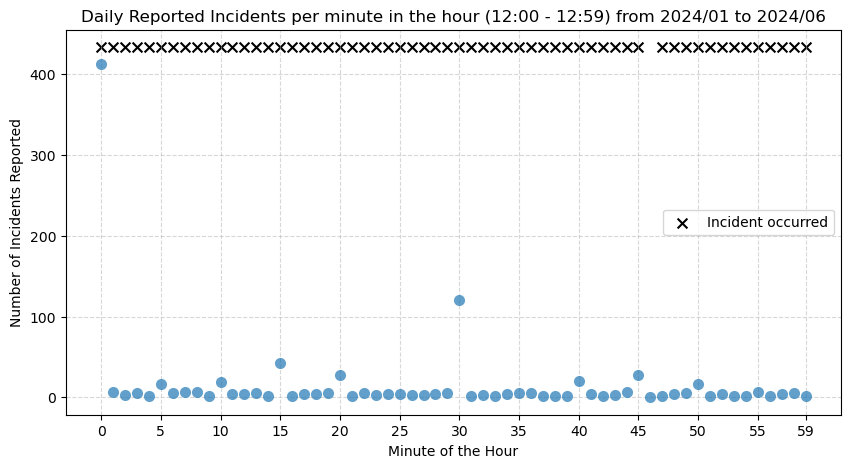

In [453]:
# Create jitter plot
plt.figure(figsize=(10, 5))

# Create jitter plot using the minute and count data
sns.stripplot(
    x=df_minute["Minute"], 
    y=df_minute["Count"], 
    jitter=True, 
    size=8, 
    alpha=0.7,
    marker="o",
)

# Add crosses (×) at the top for minutes with incidents
has_incident = df_minute[df_minute["Count"] > 0]
plt.scatter(
    has_incident["Minute"], 
    [df_minute["Count"].max() + df_minute["Count"].max()*0.05] * len(has_incident),
    marker="x", 
    color="black", 
    s=50, 
    label="Incident occurred"
)

# Customize plot
plt.xlabel("Minute of the Hour")
plt.ylabel("Number of Incidents Reported") 
plt.title(f"Daily Reported Incidents per minute in the hour ({hour:02d}:00 - {hour:02d}:59) from {year}/{month_start:02d} to {year}/{month_end:02d}")
plt.xticks(list(range(0, 60, 5)) + [59])
plt.grid(axis="both", linestyle="--", alpha=0.5)
plt.legend()

plt.show()

> * Last time, we did lots of bar-plots. Today, we"ll play around with histograms (creating two crime-data based versions of the plot-type shown in DAOST **Figure 2-2**). I think the GPS data could be fun to see this way. 
> 1. This time, pick two crime-types with different geographical patterns **and** a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
> 2. Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like `numpy.histogram`. This function gives you the counts and then you do your own plotting. 

In [454]:
# Crime of choice
crime_1 = "PROSTITUTION"
# crime_2 = "LARCENY/THEFT"
crime_2 = "DRUG/NARCOTIC"

# Filter by the two crimes of interest and concatenate the DataFrames
df_1 = df[df["Category"] == crime_1][df["Year"] >= 2008].dropna(subset=["Latitude (Y)"])
df_2 = df[df["Category"] == crime_2][df["Year"] >= 2022].dropna(subset=["Latitude (Y)"])
df_temp = pd.concat([df_1, df_2])

print(df_1.shape)
display(df_1.head())
print(df_2.shape)
display(df_2.head())

(9739, 11)


/tmp/ipykernel_8436/2588259601.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/tmp/ipykernel_8436/2588259601.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Category,Police District,Longitude (X),Latitude (Y),Day of Week,Hour,Minute,Day,Month,MonthName,Year
543265,PROSTITUTION,TENDERLOIN,-122.416236,37.784913,Wednesday,0,40,2,1,January,2008
543274,PROSTITUTION,NORTHERN,-122.419673,37.789669,Wednesday,1,20,2,1,January,2008
543281,PROSTITUTION,NORTHERN,-122.420120,37.787757,Wednesday,2,0,2,1,January,2008
543287,PROSTITUTION,TENDERLOIN,-122.416075,37.784450,Wednesday,2,45,2,1,January,2008
543381,PROSTITUTION,MISSION,-122.413108,37.765448,Wednesday,11,20,2,1,January,2008


(12048, 11)


,Category,Police District,Longitude (X),Latitude (Y),Day of Week,Hour,Minute,Day,Month,MonthName,Year
2485868,DRUG/NARCOTIC,SOUTHERN,-122.415375,37.774845,Saturday,0,0,1,1,January,2022
2486026,DRUG/NARCOTIC,TENDERLOIN,-122.415883,37.783516,Saturday,8,16,1,1,January,2022
2486027,DRUG/NARCOTIC,TENDERLOIN,-122.415883,37.783516,Saturday,8,16,1,1,January,2022
2486028,DRUG/NARCOTIC,TENDERLOIN,-122.415886,37.783516,Saturday,8,16,1,1,January,2022
2486033,DRUG/NARCOTIC,TENDERLOIN,-122.411933,37.780006,Saturday,8,57,1,1,January,2022


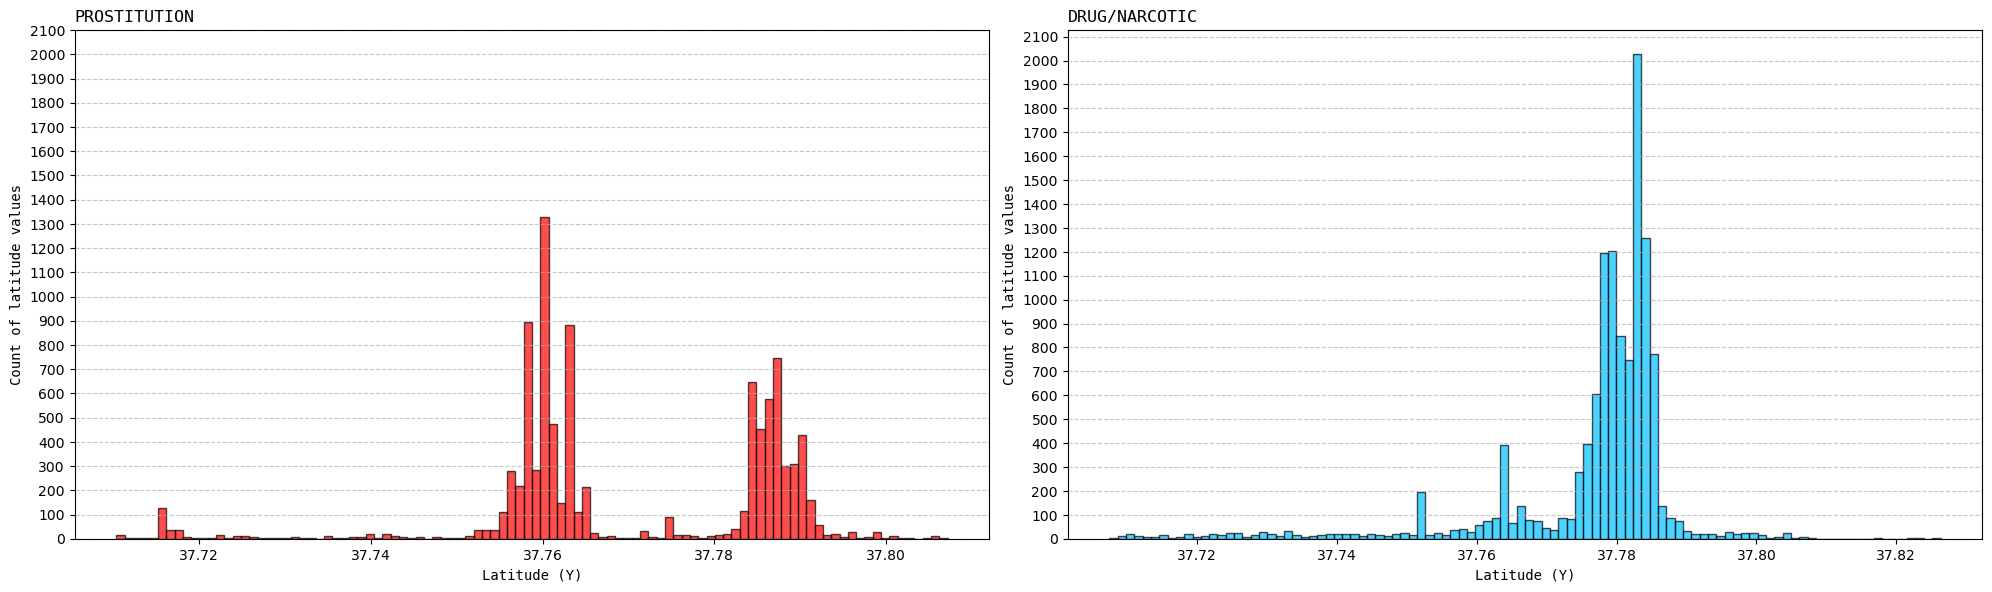

In [455]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

num_bins = 100

# Compute histogram using numpy
counts_1, bin_edges_1 = np.histogram(df_1["Latitude (Y)"], bins=num_bins)
counts_2, bin_edges_2 = np.histogram(df_2["Latitude (Y)"], bins=num_bins)

max_count = max(max(counts_1), max(counts_2))

# Plot the histograms
axs[0].bar(
    bin_edges_1[:-1], 
    counts_1, 
    color="red", 
    width=np.diff(bin_edges_1), 
    edgecolor="black", 
    alpha=0.7
)
axs[0].grid(axis="y", linestyle="--", alpha=0.7)
axs[0].set_title(crime_1, loc="left", fontfamily="monospace")
axs[0].set_ylabel("Count of latitude values", fontfamily="monospace")
axs[0].set_yticks(np.arange(0, max_count*1.05, 100))
axs[0].set_xlabel("Latitude (Y)", fontfamily="monospace")

axs[1].bar(
    bin_edges_2[:-1], 
    counts_2, 
    color="deepskyblue", 
    width=np.diff(bin_edges_2), 
    edgecolor="black", 
    alpha=0.7
)
axs[1].grid(axis="y", linestyle="--", alpha=0.7)
axs[1].set_title(crime_2, loc="left", fontfamily="monospace")
axs[1].set_ylabel("Count of latitude values", fontfamily="monospace")
axs[1].set_ylabel("Count of latitude values", fontfamily="monospace")
axs[1].set_yticks(np.arange(0, max_count*1.05, 100))
axs[1].set_xlabel("Latitude (Y)", fontfamily="monospace")

fig.tight_layout(pad = 1.0)
plt.savefig(os.path.join(plots_path, "W3_ex3_1_histograms.pdf"), format="pdf", bbox_inches="tight")
plt.show()

> * Next up is using the plot-type shown in **Figure 2-4** from DAOST, but with the data you used to create Figure 2.1. There is not a single great way to create kernel density plots in Python. [Here](https://www.geeksforgeeks.org/density-plots-with-pandas-in-python/), you"ll finde a pandas based strategy, but you can also use `gaussian_kde` from `scipy.stats` ([for an example, check out this stackoverflow post](https://stackoverflow.com/questions/4150171/how-to-create-a-density-plot-in-matplotlib)) or you can use [`seaborn.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html). There is also another nice tutorial for KDE plots [here](https://medium.com/towards-data-science/histograms-and-density-plots-in-python-f6bda88f5ac0). <font color="gray">Or ask your LLM what it recommends</font>.

In [456]:
max_count = df_sample["Minute"].value_counts().max()
max_count

np.int64(5488)

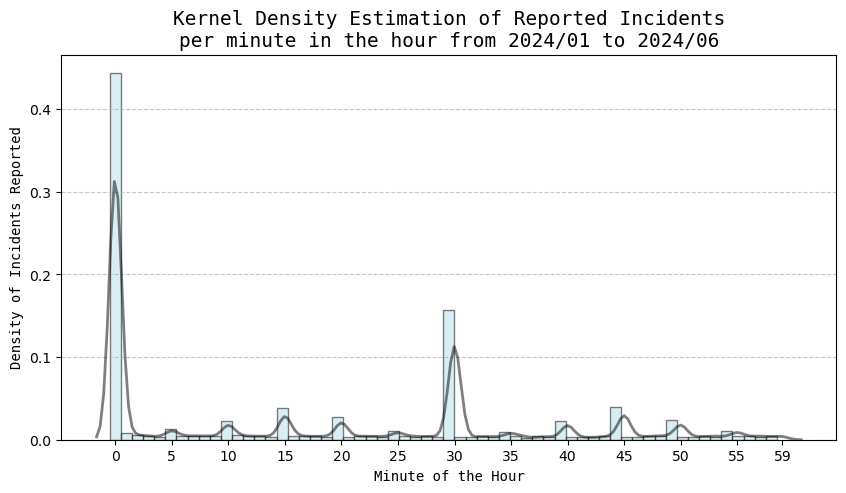

In [457]:
plt.figure(figsize=(10, 5))

max_count = df_sample["Minute"].value_counts().max()
num_bins = 60
counts, bin_edges = np.histogram(df_sample["Minute"], bins=num_bins, density=True)

# Plot the histograms
plt.bar(
    bin_edges[:-1], 
    counts, 
    color="powderblue", 
    width=np.diff(bin_edges), 
    edgecolor="black", 
    alpha=0.5
)
sns.kdeplot(
    data=df_sample, 
    x="Minute", 
    bw_adjust=.2, 
    fill=False, 
    color="black", 
    alpha=0.5,
    linewidth=2,
    linestyle="-" # '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(list(range(0, 60, 5)) + [59])
plt.xlabel("Minute of the Hour", fontfamily="monospace")
plt.ylabel("Density of Incidents Reported", fontfamily="monospace")
plt.title(f"Kernel Density Estimation of Reported Incidents\nper minute in the hour from {year}/{month_start:02d} to {year}/{month_end:02d}", fontfamily="monospace", fontsize=14)

plt.savefig(os.path.join(plots_path, "W3_ex3_1_kde.pdf"), format="pdf", bbox_inches="tight")
plt.show()

> * Now grab 25 random timepoints from the dataset (of 1000-10000 original data) you"ve just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can be misleading? 

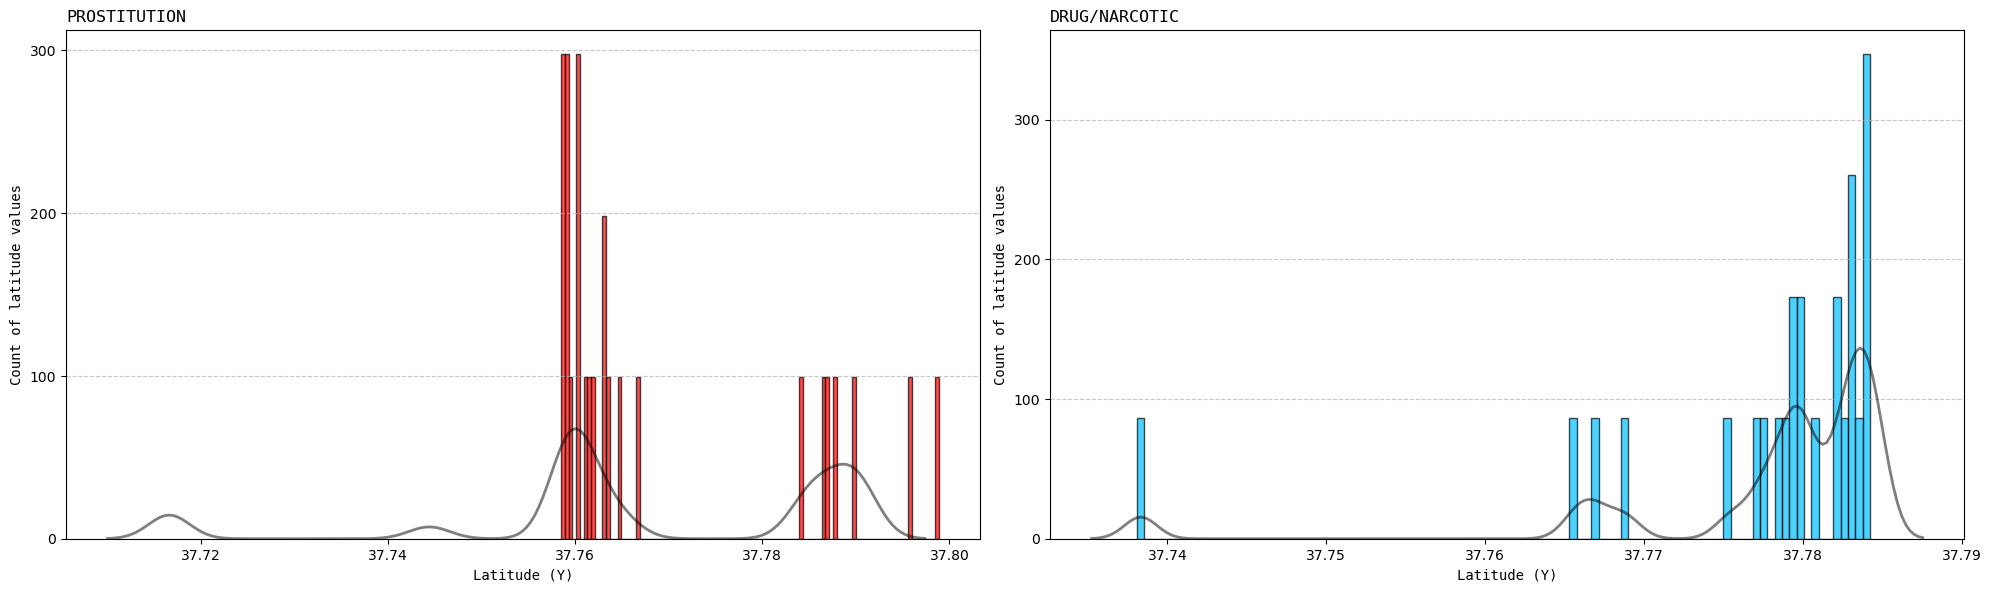

In [458]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

num_bins = 100

# Compute histogram of the sampled data
counts_1, bin_edges_1 = np.histogram(
    df_1["Latitude (Y)"].sample(n=25, random_state=1), 
    bins=num_bins, 
    density=True
)
counts_2, bin_edges_2 = np.histogram(
    df_2["Latitude (Y)"].sample(n=25, random_state=1), 
    bins=num_bins, 
    density=True
)

max_count = max(max(counts_1), max(counts_2))

# Plot the histograms with KDE overlay
axs[0].bar(
    bin_edges_1[:-1], 
    counts_1, 
    color="red", 
    width=np.diff(bin_edges_1), 
    edgecolor="black", 
    alpha=0.7
)
axs[0].grid(axis="y", linestyle="--", alpha=0.7)
axs[0].set_title(crime_1, loc="left", fontfamily="monospace")
axs[0].set_ylabel("Count of latitude values", fontfamily="monospace")
axs[0].set_yticks(np.arange(0, max_count*1.05, 100))
axs[0].set_xlabel("Latitude (Y)", fontfamily="monospace")

sns.kdeplot(
    data=df_1["Latitude (Y)"].sample(n=25), 
    bw_adjust=.2, 
    fill=False, 
    color="black", 
    alpha=0.5,
    linewidth=2,
    linestyle="-",
    ax=axs[0]
)

axs[1].bar(
    bin_edges_2[:-1], 
    counts_2, 
    color="deepskyblue", 
    width=np.diff(bin_edges_2), 
    edgecolor="black", 
    alpha=0.7
)
axs[1].grid(axis="y", linestyle="--", alpha=0.7)
axs[1].set_title(crime_2, loc="left", fontfamily="monospace")
axs[1].set_ylabel("Count of latitude values", fontfamily="monospace")
axs[1].set_ylabel("Count of latitude values", fontfamily="monospace")
axs[1].set_yticks(np.arange(0, max_count*1.05, 100))
axs[1].set_xlabel("Latitude (Y)", fontfamily="monospace")

sns.kdeplot(
    data=df_2["Latitude (Y)"].sample(n=25, random_state=1), 
    bw_adjust=.2, 
    fill=False, 
    color="black", 
    alpha=0.5,
    linewidth=2,
    linestyle="-",
    ax=axs[1]
)

fig.tight_layout(pad = 1.0)
plt.savefig(os.path.join(plots_path, "W3_ex3_1_histograms.pdf"), format="pdf", bbox_inches="tight")
plt.show()

### *Excercise Part 2*: 

> * Now we"ll work on creating two versions of the plot in **Figure 2-11**, but using the GPS data you used for your version of Figure 2-2. Comment on the result. It is not easy to create this plot from scracth.    
>   * **Hint:** Take a look at the `scipy.stats.probplot` function. 

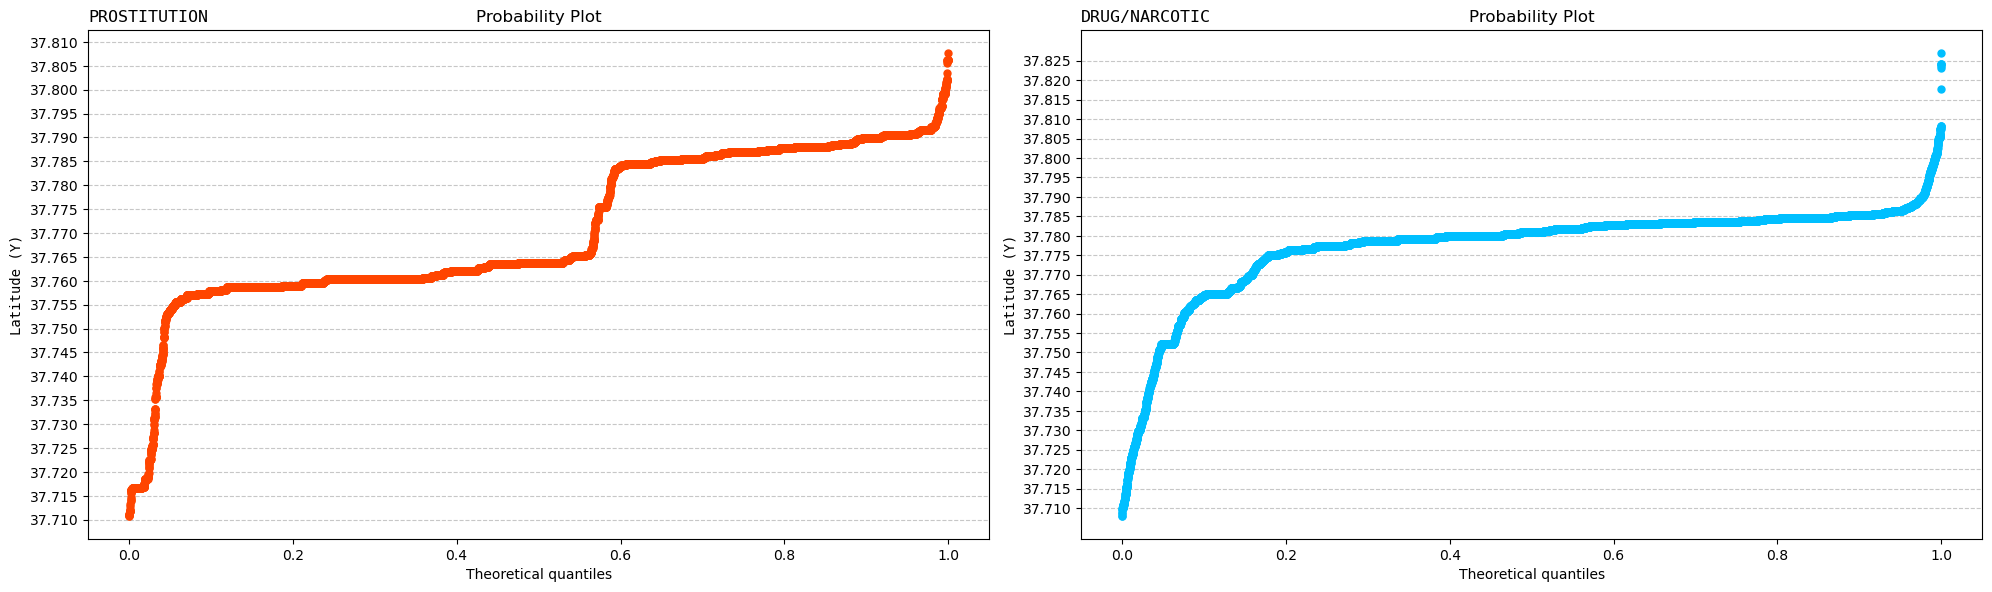

In [459]:
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# LEFT PLOT
stats.probplot(
    x = df_1["Latitude (Y)"], 
    dist = "uniform",
    plot = axs[0],
    fit=False
)
axs[0].set_title(crime_1, loc="left", fontfamily="monospace")
axs[0].set_ylabel("Latitude (Y)", fontfamily="monospace")
axs[0].set_yticks(np.arange(
    start =round(df_1["Latitude (Y)"].min(),2),
    stop  =round(df_1["Latitude (Y)"].max(),2),
    step  =0.0050
))
axs[0].get_lines()[0].set_markerfacecolor('orangered')
axs[0].get_lines()[0].set_markeredgecolor('orangered')
axs[0].get_lines()[0].set_markersize(5.0)
axs[0].grid(axis="y", linestyle="--", alpha=0.7)

# RIGHT PLOT
stats.probplot(
    x = df_2["Latitude (Y)"],
    dist = "uniform",
    plot = axs[1],
    fit=False
)
axs[1].set_title(crime_2, loc="left", fontfamily="monospace")
axs[1].set_ylabel("Latitude (Y)", fontfamily="monospace")
axs[1].set_yticks(np.arange(
    start =round(df_2["Latitude (Y)"].min(),2),
    stop  =round(df_2["Latitude (Y)"].max(),2),
    step  =0.0050
))
axs[1].get_lines()[0].set_markerfacecolor('deepskyblue')
axs[1].get_lines()[0].set_markeredgecolor('deepskyblue')
axs[1].get_lines()[0].set_markersize(5.0)
axs[1].grid(axis="y", linestyle="--", alpha=0.7)

fig.tight_layout(pad = 1.0)
plt.show()

> * OK, we"re almost done, but we need some box plots. Here, I"d like you to use the box plots to visualize fluctuations of how many crimes happen per day. We"ll use data from the 15 focus crimes defined last week.

In [460]:
focuscrimes = (
    'ASSAULT',
    'BURGLARY',
    'DRUG/NARCOTIC',
    'DRUNKENNESS',
    'LARCENY/THEFT',
    'PROSTITUTION',
    'ROBBERY',
    'STOLEN PROPERTY',
    'TRESPASS',
    'VANDALISM',
    'VEHICLE THEFT',
    'WEAPON LAWS',
)

In [461]:
df_focus = df[df["Category"].isin(focuscrimes)]
df_focus

,Category,Police District,Longitude (X),Latitude (Y),Day of Week,Hour,Minute,Day,Month,MonthName,Year
0,VANDALISM,RICHMOND,-122.462415,37.783951,Thursday,0,1,1,1,January,2004
4,ASSAULT,INGLESIDE,-122.417145,37.712150,Thursday,0,1,1,1,January,2004
7,VANDALISM,TARAVAL,-122.508936,37.757470,Thursday,0,1,1,1,January,2004
13,WEAPON LAWS,INGLESIDE,-122.432676,37.730713,Thursday,0,1,1,1,January,2004
15,STOLEN PROPERTY,TARAVAL,-122.450635,37.715772,Thursday,0,1,1,1,January,2004
...,...,...,...,...,...,...,...,...,...,...,...
2862972,WEAPON LAWS,BAYVIEW,-122.379112,37.737679,Tuesday,22,50,31,12,December,2024
2862973,VANDALISM,MISSION,-122.426384,37.764645,Tuesday,23,0,31,12,December,2024
2862974,LARCENY/THEFT,MISSION,NaN,NaN,Tuesday,23,0,31,12,December,2024
2862976,VEHICLE THEFT,NORTHERN,-122.420212,37.788223,Tuesday,23,0,31,12,December,2024


>   * For the full time-span of the data, calulate the **number of crimes per day** within each category for the entire duration of the data.

In [462]:
# Convert 'Day', 'Month', and 'Year' into a datetime column
df_focus["Date"] = pd.to_datetime(df_focus[['Year', 'Month', 'Day']])
df_focus.head()

/tmp/ipykernel_8436/3755372895.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Category,Police District,Longitude (X),Latitude (Y),Day of Week,Hour,Minute,Day,Month,MonthName,Year,Date
0,VANDALISM,RICHMOND,-122.462415,37.783951,Thursday,0,1,1,1,January,2004,2004-01-01
4,ASSAULT,INGLESIDE,-122.417145,37.712150,Thursday,0,1,1,1,January,2004,2004-01-01
7,VANDALISM,TARAVAL,-122.508936,37.757470,Thursday,0,1,1,1,January,2004,2004-01-01
13,WEAPON LAWS,INGLESIDE,-122.432676,37.730713,Thursday,0,1,1,1,January,2004,2004-01-01
15,STOLEN PROPERTY,TARAVAL,-122.450635,37.715772,Thursday,0,1,1,1,January,2004,2004-01-01


In [463]:
# Group by category and day of the month
day_groupings = df_focus.groupby(['Date','Category']).size().unstack().reindex().fillna(0).astype(int).reset_index()
day_groupings.head()

Category,Date,ASSAULT,BURGLARY,DRUG/NARCOTIC,DRUNKENNESS,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,TRESPASS,VANDALISM,VEHICLE THEFT,WEAPON LAWS
0,2004-01-01,47,8,18,5,65,0,8,2,2,18,39,5
1,2004-01-02,19,13,27,1,59,7,3,2,5,17,27,1
2,2004-01-03,28,14,26,4,62,0,5,3,2,21,33,1
3,2004-01-04,35,12,30,0,63,0,5,1,2,14,31,3
4,2004-01-05,30,20,32,1,72,2,8,2,6,15,41,1


In [464]:
day_groupings["Date"]

0      2004-01-01
1      2004-01-02
2      2004-01-03
3      2004-01-04
4      2004-01-05
          ...    
7664   2024-12-27
7665   2024-12-28
7666   2024-12-29
7667   2024-12-30
7668   2024-12-31
Name: Date, Length: 7669, dtype: datetime64[ns]

In [465]:
day_groupings["ASSAULT"]

0       47
1       19
2       28
3       35
4       30
        ..
7664    18
7665    29
7666    24
7667    20
7668    15
Name: ASSAULT, Length: 7669, dtype: int64

>   * Create a box-and whiskers plot showing the mean, median, quantiles, etc for all 15 crime-types side-by-side. There are many ways to do this. I like to use [matplotlibs"s built in functionality](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html), but you can also achieve good results with [seaborn](https://seaborn.pydata.org/generated/seaborn.boxplot.html) or [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html).

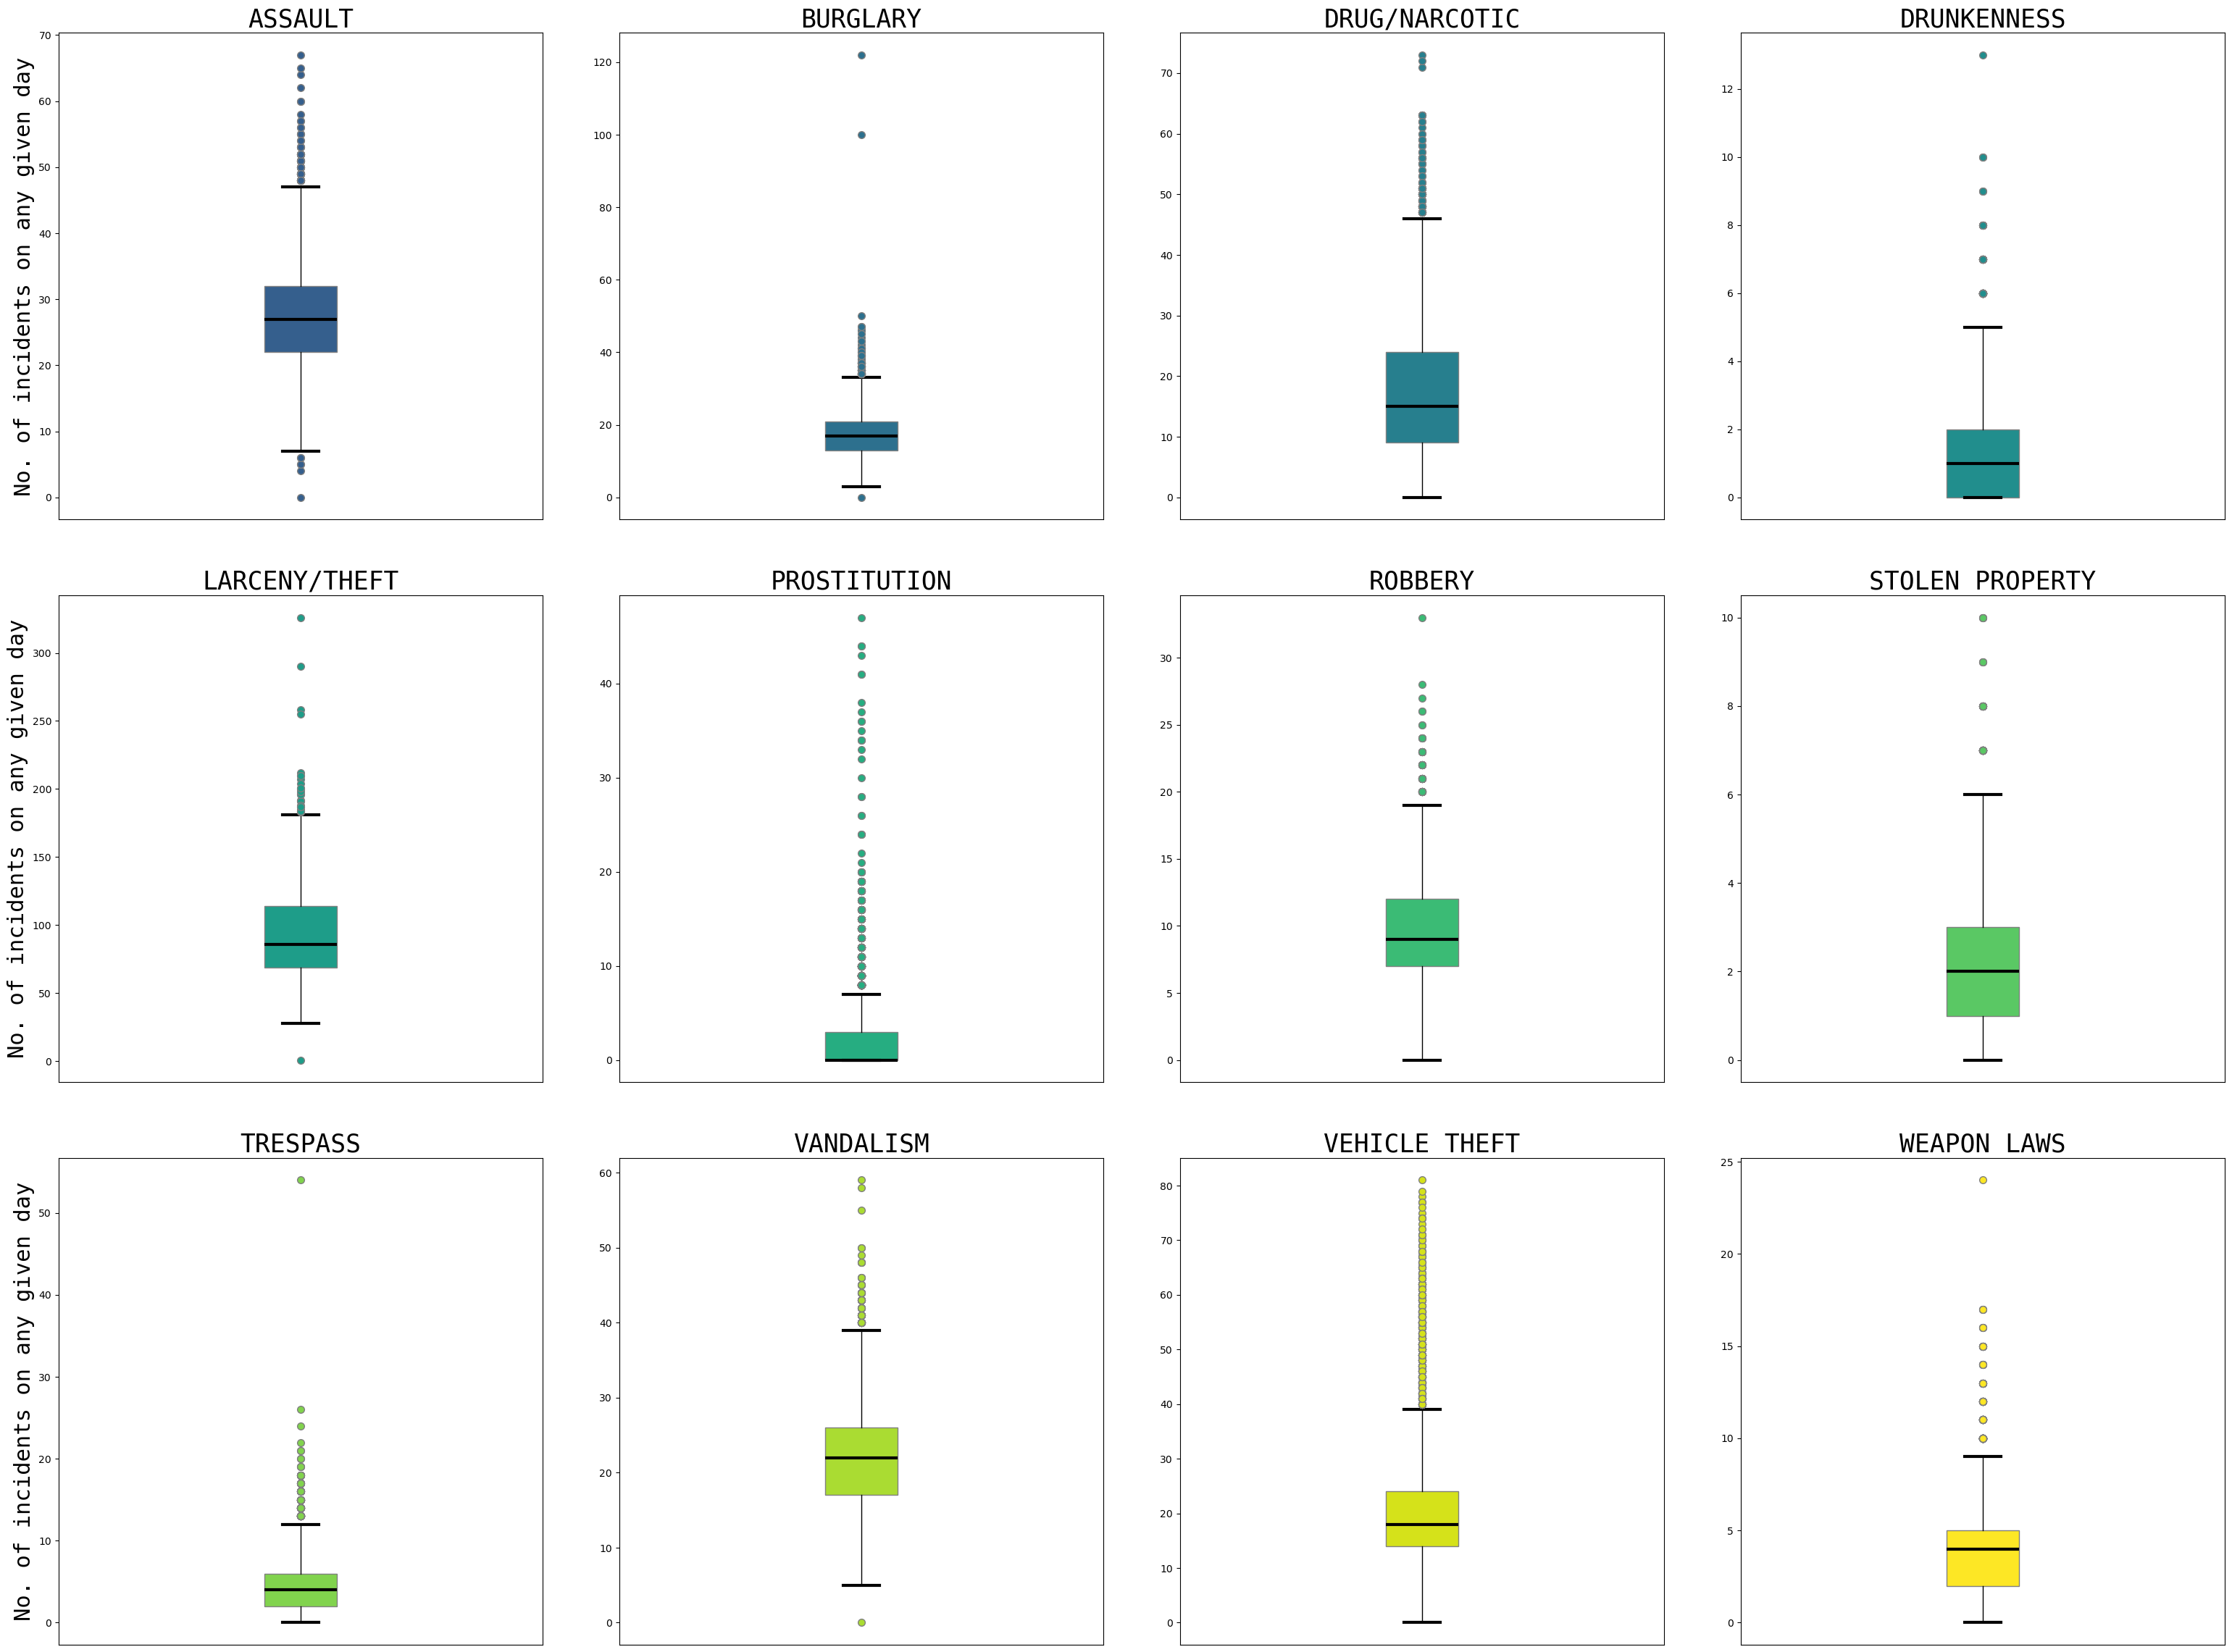

In [466]:
# Create a grid of subplots based on number of focus crimes

# Font sizes
subtitle_fontsize = 25
tick_fontsize = 20
label_fontsize = 22

# Colors shades
colors = plt.colormaps['viridis'](np.linspace(0.3, 1, len(focuscrimes)))

# Dimensions of the grid
no_cols = 4
no_rows = int(len(focuscrimes)/no_cols)
col_size = 8
row_size = 8

fig, axs = plt.subplots(
    no_rows,
    no_cols,
    figsize=(
        col_size*no_cols,  # Hardcoded width per column 
        row_size*no_rows   # Hardcoded height per row
    ), 
    sharex=False
)

# Flatten for easier indexing
axs = axs.flatten()

# PLOTTING THE DATA
for i in list(range(0, len(focuscrimes), 1)):
    axs[i].boxplot(
        day_groupings[focuscrimes[i]],
        patch_artist=True,
        boxprops=dict(facecolor=colors[i], color="grey"),
        capprops=dict(color="black", linewidth=3),
        whiskerprops=dict(color="black"),
        flierprops=dict(color="black", markeredgecolor="grey", markerfacecolor=colors[i], markersize=7),
        medianprops=dict(color="black", linewidth=3),
    )

    axs[i].set_title(focuscrimes[i], loc='center', fontfamily="monospace", fontsize = subtitle_fontsize)
    axs[i].set_xticks([])
    # axs[i].set_ylabel('No. of incidents on any given day', fontfamily="monospace", fontsize = label_fontsize)

    # Check if given subplot is in the leftmost column, if not remove x-ticks
    if i%no_cols==0:  
        axs[i].set_ylabel('No. of incidents on any given day', fontfamily="monospace", fontsize = label_fontsize)
    else:
        axs[i].set_ylabel('')

fig.tight_layout(pad = 5.0)
plt.savefig(os.path.join(plots_path, "W3_ex3_2_boxplots_crimesperday.pdf"), format="pdf", bbox_inches="tight")
plt.show()


>   * What does this plot reveal that you can"t see in the plots from last time?

We can say a lot of smart things here, if needed be :)

> * Also I want to show you guys another interesting use of box plots. To get started, let"s calculate another average for each focus-crime, namely what time of day the crime happens. So this time, the distribution we want to plot is the average time-of-day that a crime takes place. There are many ways to do this, but let me describe one way to do it. 


>   * You also have to deal with the fact that time is annoyingly not divided into nice units that go to 100 like many other numbers. I can think of two ways to deal with this.
>     * For each time-of-day, simply encode it as seconds since midnight.
>     * Or keep each whole hour, and convert the minute/second count to a percentage of an hour. So 10:15 $\rightarrow$ 10.25, 8:40 $\rightarrow$ 8.67, etc.


In [467]:
df_focus["Time"] = df_focus["Hour"] + df_focus["Minute"]/60
df_focus

/tmp/ipykernel_8436/1995473747.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Category,Police District,Longitude (X),Latitude (Y),Day of Week,Hour,Minute,Day,Month,MonthName,Year,Date,Time
0,VANDALISM,RICHMOND,-122.462415,37.783951,Thursday,0,1,1,1,January,2004,2004-01-01,0.016667
4,ASSAULT,INGLESIDE,-122.417145,37.712150,Thursday,0,1,1,1,January,2004,2004-01-01,0.016667
7,VANDALISM,TARAVAL,-122.508936,37.757470,Thursday,0,1,1,1,January,2004,2004-01-01,0.016667
13,WEAPON LAWS,INGLESIDE,-122.432676,37.730713,Thursday,0,1,1,1,January,2004,2004-01-01,0.016667
15,STOLEN PROPERTY,TARAVAL,-122.450635,37.715772,Thursday,0,1,1,1,January,2004,2004-01-01,0.016667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862972,WEAPON LAWS,BAYVIEW,-122.379112,37.737679,Tuesday,22,50,31,12,December,2024,2024-12-31,22.833333
2862973,VANDALISM,MISSION,-122.426384,37.764645,Tuesday,23,0,31,12,December,2024,2024-12-31,23.000000
2862974,LARCENY/THEFT,MISSION,NaN,NaN,Tuesday,23,0,31,12,December,2024,2024-12-31,23.000000
2862976,VEHICLE THEFT,NORTHERN,-122.420212,37.788223,Tuesday,23,0,31,12,December,2024,2024-12-31,23.000000


>   * For datapoint, the only thing you care about is the time-of-day, so discard everything else.

In [468]:
# Group by category and day of the month
time_groupings = df_focus.groupby(['Time','Category']).size().unstack().reindex().fillna(0).astype(int).reset_index()
time_groupings

Category,Time,ASSAULT,BURGLARY,DRUG/NARCOTIC,DRUNKENNESS,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,TRESPASS,VANDALISM,VEHICLE THEFT,WEAPON LAWS
0,0.000000,699,1404,153,2,9082,8,184,95,1146,1861,1168,109
1,0.016667,2820,2008,534,71,12000,161,500,172,328,3374,2576,191
2,0.033333,82,34,70,11,91,10,33,5,6,57,23,21
3,0.050000,90,34,59,6,46,10,31,8,13,57,22,36
4,0.066667,76,27,51,3,79,12,17,6,10,36,15,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,23.916667,258,73,128,15,592,86,138,16,16,200,122,38
1436,23.933333,54,20,42,10,44,9,21,8,15,36,5,18
1437,23.950000,53,24,72,8,37,6,25,8,8,35,15,20
1438,23.966667,71,24,58,7,78,13,21,5,6,45,15,19


> * Now you can create box-plots to create an overview of *when various crimes occur*. Note that these plot have quite a different interpretation than ones we created in the previous exercise. Cool, right?  

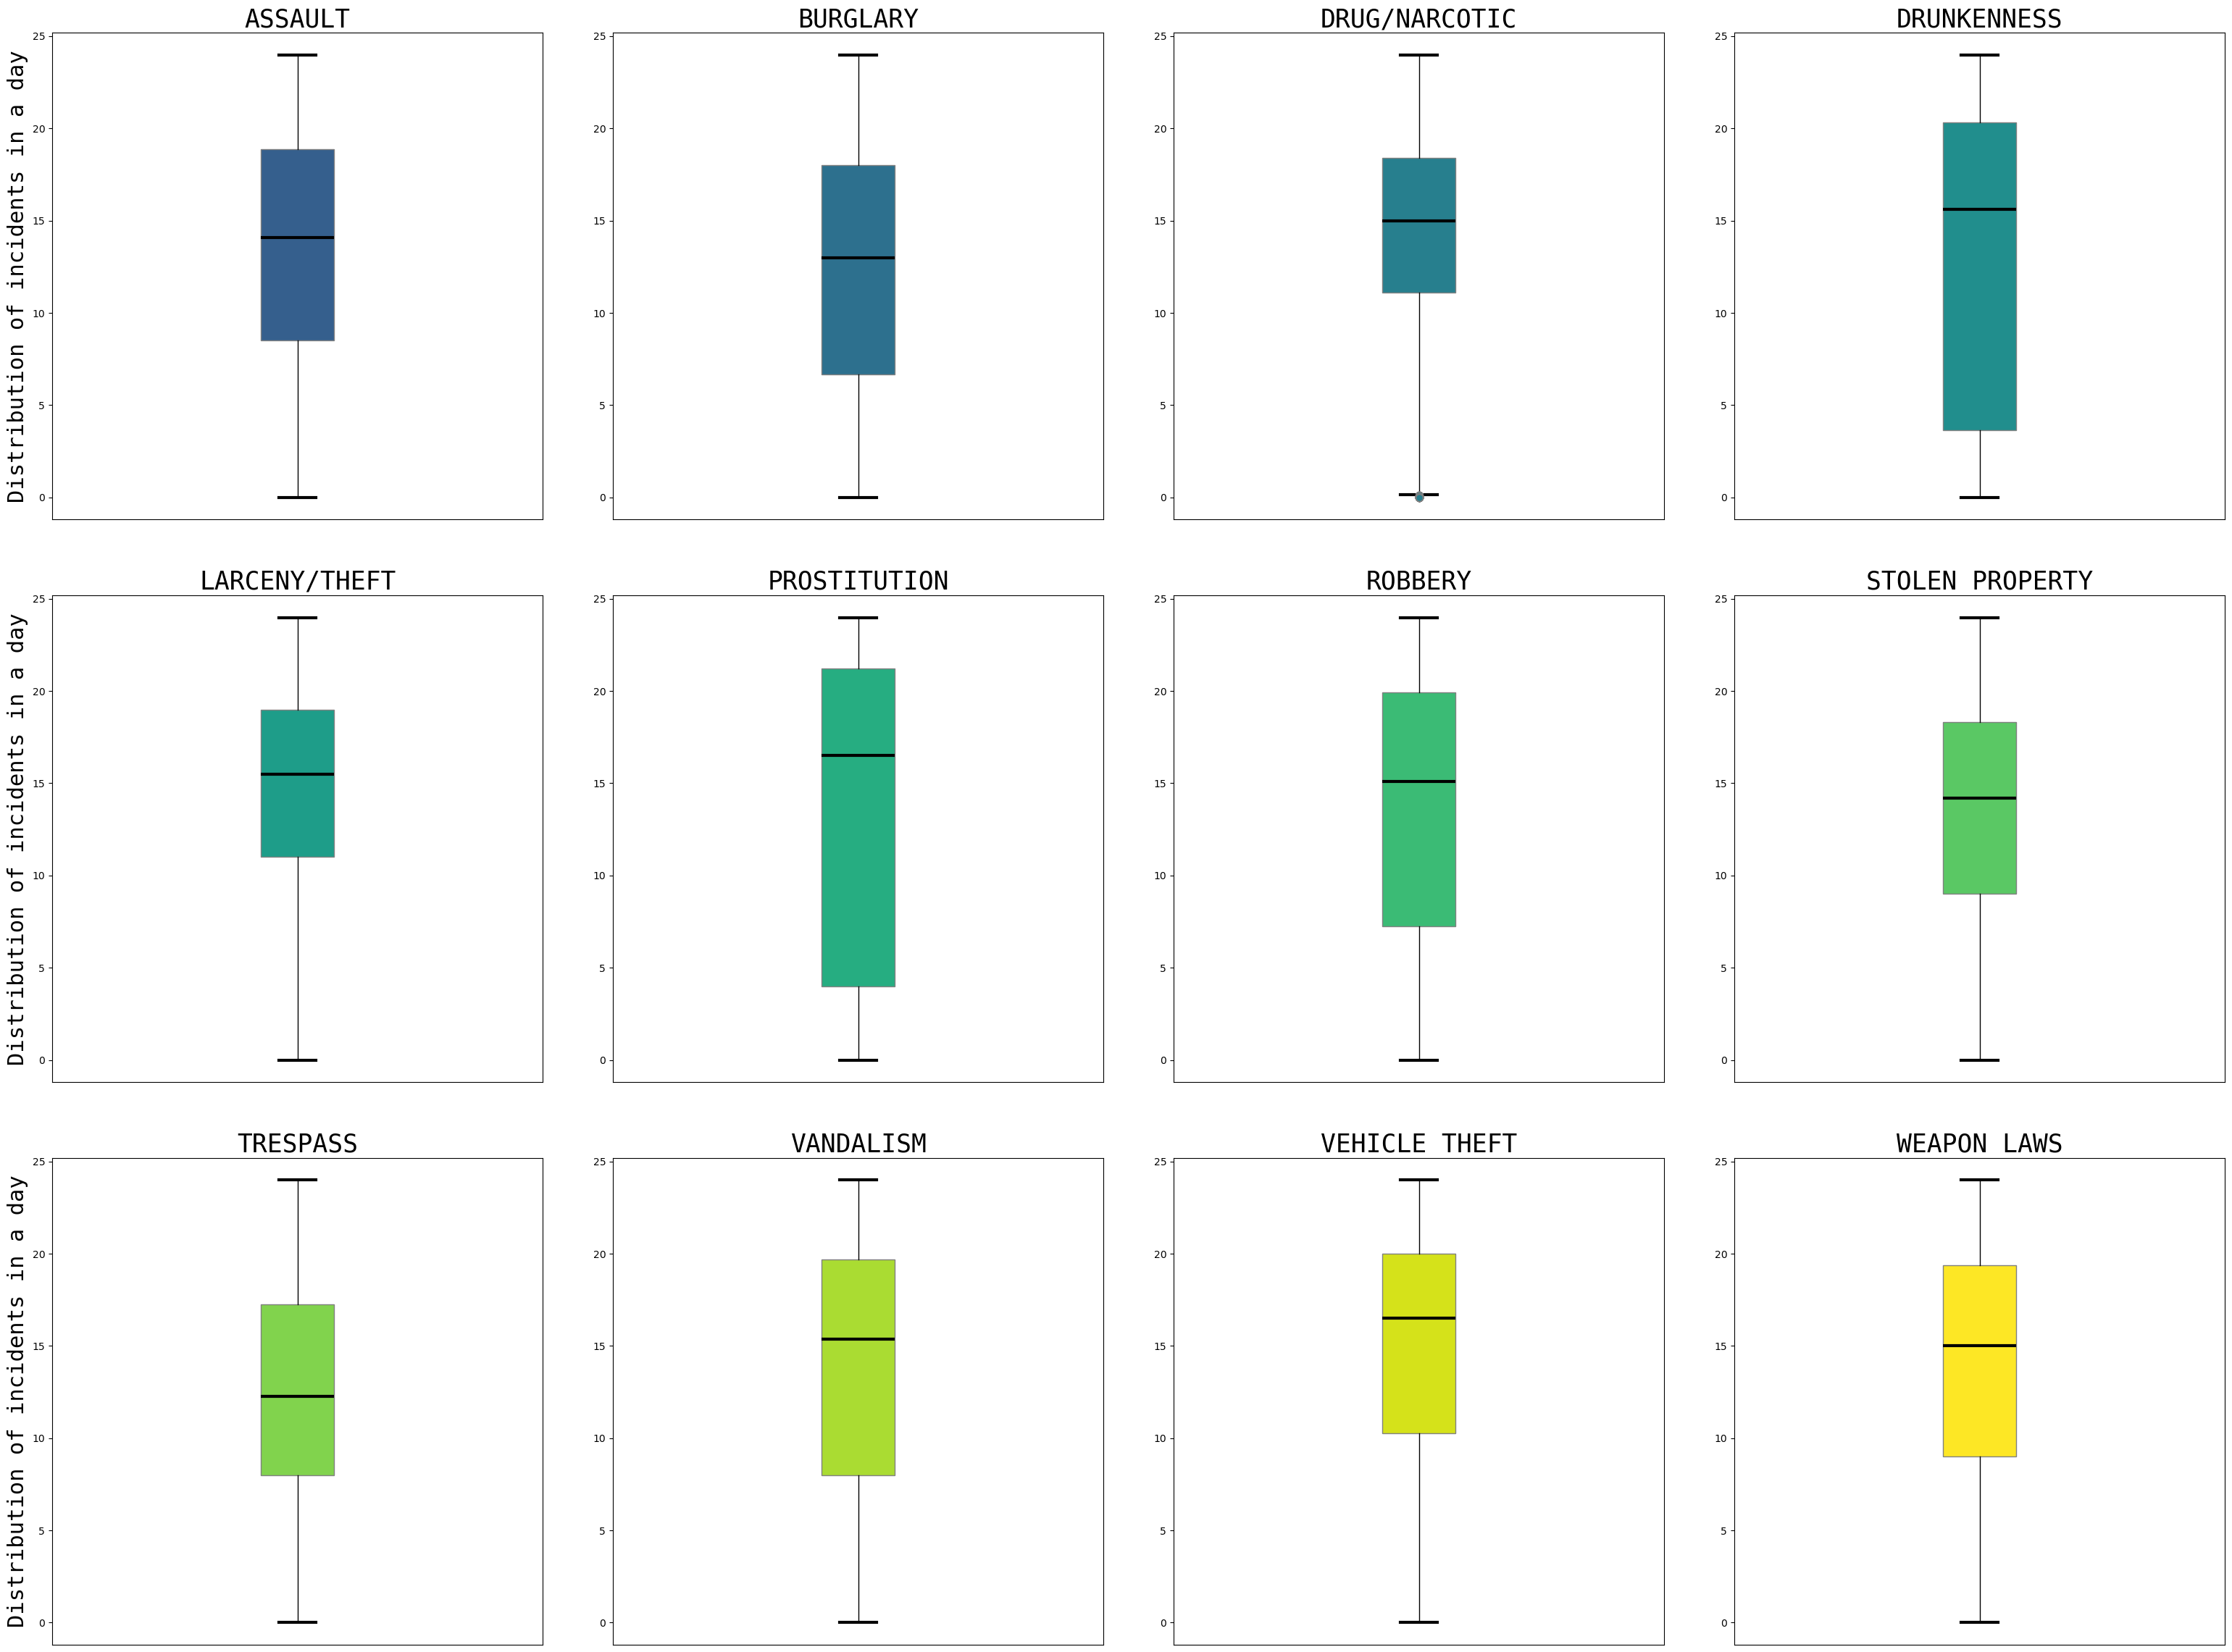

In [469]:
# Create a grid of subplots based on number of focus crimes

# Font sizes
subtitle_fontsize = 25
tick_fontsize = 20
label_fontsize = 22

# Colors shades
colors = plt.colormaps["viridis"](np.linspace(0.3, 1, len(focuscrimes)))

# Dimensions of the grid
no_cols = 4
no_rows = int(len(focuscrimes)/no_cols)
col_size = 8
row_size = 8

fig, axs = plt.subplots(
    no_rows,
    no_cols,
    figsize=(
        col_size*no_cols,  # Hardcoded width per column 
        row_size*no_rows   # Hardcoded height per row
    ), 
    sharex=False
)

# Flatten for easier indexing
axs = axs.flatten()

# PLOTTING THE DATA
for i in list(range(0, len(focuscrimes), 1)):
    axs[i].boxplot(
        df_focus[df_focus["Category"]==focuscrimes[i]]["Time"],
        # time_groupings[focuscrimes[i]],
        patch_artist=True,
        boxprops=dict(facecolor=colors[i], color="grey"),
        capprops=dict(color="black", linewidth=3),
        whiskerprops=dict(color="black"),
        flierprops=dict(color="black", markeredgecolor="grey", markerfacecolor=colors[i], markersize=7),
        medianprops=dict(color="black", linewidth=3),
    )

    axs[i].set_title(focuscrimes[i], loc='center', fontfamily="monospace", fontsize = subtitle_fontsize)
    axs[i].set_xticks([])
    # axs[i].set_ylabel('No. of incidents on any given day', fontfamily="monospace", fontsize = label_fontsize)

    # Check if given subplot is in the leftmost column, if not remove x-ticks
    if i%no_cols==0:  
        axs[i].set_ylabel('Distribution of incidents in a day', fontfamily="monospace", fontsize = label_fontsize)
    else:
        axs[i].set_ylabel('')

fig.tight_layout(pad = 5.0)
plt.savefig(os.path.join(plots_path, "W3_ex3_2_boxplots_timeofday.pdf"), format="pdf", bbox_inches="tight")
plt.show()

## Part 4: Visualizing geodata with Plotly

So visualizing geodata used to be difficult, but with `Plotly` things have gotten easier. 

Like matplotlib, Plotly is an [open-source data visualization library](https://plotly.com/python/), but it"s aimed at making interactive visualizations that can be rendered in a web browser (or jupyter notebook). You can read about it and learn how to install it [here](https://plotly.com/python/getting-started/).

In [470]:
%%capture
%pip install plotly


That means that we can easily draw on the fact that the crime data has lots of exciting geo-data attached. The map we"re going to be creating is called a **[choropleth map](https://en.wikipedia.org/wiki/Choropleth_map)** (more on these later), which is basically a map, where we color in shapefiles (more on this below) based on some value that we care about. 

We"ll take our inspiration from Plotly"s gentle intro to [Choropleth maps](https://plotly.com/python/mapbox-county-choropleth/)

![districts from web](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/sfpdfinal.png)

But because we are cool programmers, we want to create our own maps, **with our own information on them**. Let"s do it!


### *Exercise*: Let"s plot a map with some random values in it. <font color="gray"></font>

> What we need to do to get going is some random data. Below is a little dictionary with a random value for each district.

In [471]:
randomdata = {
    "CENTRAL": 0.4821,
    # "SOUTHERN": 0.9153,
    "SOUTHERN": 0.5,
    "BAYVIEW": 0.3674,
    "MISSION": 0.7542,
    "PARK": 0.6285,
    "RICHMOND": 0.2147,
    "INGLESIDE": 0.05391,
    "TARAVAL": 0.007846,
    "NORTHERN": 0.4938,
    "TENDERLOIN": 0.08127
}

> For this exercise, we"ll use use the random values above and we"ll also need some *shape-files*.
> [Shapefiles can have many different formats](https://en.wikipedia.org/wiki/Shapefile). Because we are brilliant teachers and an all-round standup people, we are sharing the shapefiles as [`geojson`](https://en.wikipedia.org/wiki/GeoJSON), which is an easy-to-use format for shapefiles based on `json`.
>
> * Download the SFPD District shapefiles **[here](https://raw.githubusercontent.com/suneman/socialdata2025/main/files/sfpd.geojson)**

In [472]:
# Read shapefile from the provided geojson file
geojson_name = "sfpd.geojson"
geojson_path = os.path.join(files_path, geojson_name)
geojson_path

'/home/aleksandar-lukic/school/02806_Social_Data/files/sfpd.geojson'

In [473]:
import json

with open(geojson_path) as response:
    counties = json.load(response)

counties["features"][0]

{'type': 'Feature',
 'properties': {'OBJECTID': 1, 'DISTRICT': 'CENTRAL', 'COMPANY': 'A'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-122.40532134644249, 37.806867516866724],
    [-122.40440122046421, 37.80885380837723],
    [-122.40438743872008, 37.80886519707406],
    [-122.40436730880846, 37.808872966044206],
    [-122.40434376667437, 37.808869624109605],
    [-122.40431429421082, 37.80881799170733],
    [-122.40394067997407, 37.80876198999871],
    [-122.40392016838871, 37.808754877186864],
    [-122.40390555965932, 37.808734021463344],
    [-122.40390814512642, 37.80871288836611],
    [-122.40471878715235, 37.80696905969842],
    [-122.4039597318324, 37.80657809724],
    [-122.4027673862454, 37.80801170771318],
    [-122.40274578869823, 37.80802322234157],
    [-122.40271771623641, 37.80802615647638],
    [-122.40269398350013, 37.80801537335998],
    [-122.40235483855216, 37.8078397060222],
    [-122.40234023023558, 37.80781885013204],
    [-122.40234106239043, 37.80779

> * Now that you have the shapefiles, you can follow the example here: https://plotly.com/python/mapbox-county-choropleth/ but with the following modifications:
>    * In the example the `id` is a so-called FIPS code. In our case the `id` is the `DISTRICT`
>    * You will have to convert the dictionary of random values I included above to a Pandas dataframe with the right column headings.

In [474]:
df_rand = pd.DataFrame(randomdata.items(), columns=["fips", "unemp"])
df_rand

,fips,unemp
0,CENTRAL,0.482100
1,SOUTHERN,0.500000
2,BAYVIEW,0.367400
3,MISSION,0.754200
4,PARK,0.628500
5,RICHMOND,0.214700
6,INGLESIDE,0.053910
7,TARAVAL,0.007846
8,NORTHERN,0.493800
9,TENDERLOIN,0.081270


>    * The data used in the example has a range between zero and 12. Your data is between $[0,1]$. So you"ll need to modify the plotting command to accound for that change.


In [475]:
# Using min-max stretching to scale the data
def min_max_stretch(x, a=0, b=100):
    return (b-a)*(x - x.min())/(x.max() - x.min()) + a
    
df_rand["unemp_scaled"] = min_max_stretch(x=df_rand["unemp"], a=0, b=12)
df_rand

,fips,unemp,unemp_scaled
0,CENTRAL,0.482100,7.625132
1,SOUTHERN,0.500000,7.912931
2,BAYVIEW,0.367400,5.780967
3,MISSION,0.754200,12.000000
4,PARK,0.628500,9.978975
5,RICHMOND,0.214700,3.325832
6,INGLESIDE,0.053910,0.740624
7,TARAVAL,0.007846,0.000000
8,NORTHERN,0.493800,7.813247
9,TENDERLOIN,0.081270,1.180523


>    * You should also change the map to display the right zoom level.

It seems that Sune's code was made with a zoom between 10 and 11. After some trial and error, 10.8 was chosen to be the sweetspot for the centered map.

>    * And the map should center on San Francisco"s `lat` and `lon`.

In [476]:
# Find the minimum and maximum longitude and latitude values
def get_min_max_from_feature(data):
    lon_min, lon_max = (min(x[0] for x in data), max(x[0] for x in data))
    lat_min, lat_max = (min(x[1] for x in data), max(x[1] for x in data))
    return lon_min, lon_max, lat_min, lat_max

In [477]:
counties["features"][1]

{'type': 'Feature',
 'properties': {'OBJECTID': 2, 'DISTRICT': 'SOUTHERN', 'COMPANY': 'B'},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-122.38821894111335, 37.78999576746098],
     [-122.38807670509087, 37.790038461614586],
     [-122.38574398844197, 37.79097091481935],
     [-122.38573967273076, 37.7909725338809],
     [-122.38573398439247, 37.79097334019749],
     [-122.38572828067883, 37.79097355060264],
     [-122.38572195223936, 37.79097281727906],
     [-122.38571604416427, 37.79097088494577],
     [-122.3857122474927, 37.79096927643542],
     [-122.38570812615117, 37.79096671959004],
     [-122.38570427198033, 37.7909628468054],
     [-122.38570130070764, 37.79095824474871],
     [-122.38550774925817, 37.7905539563521],
     [-122.38550675440663, 37.79055027640538],
     [-122.38550682891986, 37.79054729467565],
     [-122.3855070386038, 37.790543714654795],
     [-122.3855082902088, 37.79053976021803],
     [-122.38551073723893, 37.790535548290386],
     [-122.3

In [478]:
# Get the minimum and maximum longitude and latitude values from geojson
def get_min_max_lon_lat(geojson):
    lons = []
    lats = []
    for feat in geojson["features"]:
        if feat["geometry"]["type"] == "Polygon":
            f = feat["geometry"]["coordinates"][0]
            lon_min, lon_max, lat_min, lat_max = get_min_max_from_feature(f)
            lons.append(lon_min)
            lons.append(lon_max)
            lats.append(lat_min)
            lats.append(lat_max)
        elif feat["geometry"]["type"] == "MultiPolygon":
            for poly in feat["geometry"]["coordinates"]:
                f = poly[0]
                lon_min, lon_max, lat_min, lat_max = get_min_max_from_feature(f)
                lons.append(lon_min)
                lons.append(lon_max)
                lats.append(lat_min)
                lats.append(lat_max)
    return min(lons), max(lons), min(lats), max(lats)

lon_min, lon_max, lat_min, lat_max = get_min_max_lon_lat(counties)
lon_min, lon_max, lat_min, lat_max

(-122.51494872674024,
 -122.35698271583865,
 37.70808899260604,
 37.83328828172937)

In [479]:
# Find center of the map
def get_center_lon_lat(geojson):
    lon_min, lon_max, lat_min, lat_max = get_min_max_lon_lat(geojson)
    return (lon_max + lon_min) / 2, (lat_max + lat_min) / 2

# Get the center of the map
lon_center, lat_center = get_center_lon_lat(counties)
lon_center, lat_center

(-122.43596572128945, 37.7706886371677)



> * Now you can create your map.

Mine looks something like this (but I"ve changed the random values to make it more fun, so expect your colors to be different.).



<img src="https://raw.githubusercontent.com/suneman/socialdata2025/main/files/map_example.png" alt="example" style="width:800px;"/>

You"re encouraged to play around with other settings, color schemes, etc.

In [487]:
import plotly.express as px


fig = px.choropleth_map(
    df_rand, 
    geojson=counties, 
    locations='fips', 
    color='unemp_scaled',
    color_continuous_scale="Viridis",
    range_color=(0, 12),
    map_style="open-street-map",
    # map_style="carto-positron",
    zoom=10.8, 
    center = {"lat": lat_center, "lon": lon_center},
    opacity=0.5,
    labels={'unemp_scaled':'Random Value'}
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html(os.path.join(plots_path, "W3_ex4_choromap_intro.html"))
fig.show()

> *Exercise:* But it"s crime-data. Let"s do something useful and **visualize where it is safest to leave your car on a Sunday**.
> 
> Take a moment to congratulate yourself. You now know how to create cool map plots!
> * Now, we can focus on our main goal: *determine the districts where you should (and should not) leave your car on Sundays*. (Or stated differently, count up the number of thefts.)
> * To do so, first:
>  * Filter the crime dataset by the `DayOfWeek` category and also choose the appropriate crime category.
>  * Aggregate data by police district.
> * To create the plot, remember that your range of data-values is different from before, so you"ll have to change the plotly command a bit.
> * Create a nice plot that shows the crime-levels and highlights the safest area. Remember that we want a colorbar to explain what the colors mean ... and all the other formatting needed for a nice plot.
> * Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where"s the worst place?
> * Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. *perceptual errors*):
>    * Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident? 
>    * Why do you think perceptual errors are a problem? Try to think of a few examples. You can have a look at this [article](https://www.businessinsider.com/fox-news-obamacare-chart-2014-3?r=US&IR=T) to get some inspiration.
> * <font color="gray">Optional LLM challenge: Use your LLM and your existing code to easily create plots for the same crime type, but different days, and comment on the results.</font>

<div class="alert alert-block alert-info">
For this final exercise, go nuts with using your LLM (but this is only OK if you"ve already solved the previous one on your own).
</div>